# Checkpoint 1: Dataset Selection and Exploratory Data Analysis

**Author:** Yaswanth Reddy  
**Date:** February 12, 2026  
**Course:** Data Mining Project

---

## Project Overview

This notebook documents the first checkpoint of my data mining project. The goal is to:
1. Identify three candidate datasets that support course techniques and beyond-course methods
2. Perform a comparative analysis across multiple dimensions
3. Select one dataset with clear justification
4. Conduct exploratory data analysis on the selected dataset
5. Document initial insights and research directions

---

## Table of Contents

- [A. Identification of Candidate Datasets](#a-identification-of-candidate-datasets)
- [B. Comparative Analysis of Datasets](#b-comparative-analysis-of-datasets)
- [C. Dataset Selection and Justification](#c-dataset-selection-and-justification)
- [D. Exploratory Data Analysis](#d-exploratory-data-analysis)
- [E. Initial Insights and Direction](#e-initial-insights-and-direction)
- [F. GitHub Portfolio](#f-github-portfolio)
- [Collaboration Declaration](#collaboration-declaration)

In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request
import zipfile
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully.")

Libraries imported successfully.


---

# A. Identification of Candidate Datasets

I identified three candidate datasets through a systematic evaluation process. These datasets represent different domains (Recommender Systems, Social Networks, Transactional) to ensure a comprehensive evaluation.

## Dataset 1: MovieLens 25M (Selected)

| Attribute | Description |
|-----------|-------------|
| **Dataset Name** | MovieLens 25M |
| **Source** | GroupLens Research ([link](https://grouplens.org/datasets/movielens/25m/)) |
| **Course Topic Alignment** | **Frequent Itemsets** (Movie viewing patterns), **Graph Mining** (User-Movie bipartite graph), **Clustering** (Taste communities). |
| **Beyond-Course Techniques** | **Matrix Factorization** (SVD, ALS), **Graph Neural Networks (GNNs)**, **Neural Collaborative Filtering**. |
| **Dataset Size/Structure** | 25M ratings, 62k movies, 162k users. User-Item-Rating matrix structure with rich tag metadata. |
| **Data Types** | User ID, Movie ID, Rating (numeric), Timestamp, Tags (text), Genres (categorical). |
| **Target Variable(s)** | Rating (Regression) or Next-Item-Prediction (Classification). |
| **Licensing** | Academic/Research usage permitted. |

## Dataset 2: Reddit Multi-Modal Dataset

| Attribute | Description |
|-----------|-------------|
| **Dataset Name** | Reddit Multi-Modal (WSDM/ICWSM) |
| **Source** | Pushshift / WSDM Papers ([link](https://files.pushshift.io/reddit/)) |
| **Course Topic Alignment** | **Graph Mining** (User-Subreddit networks), **Text Mining** (Comment analysis), **Anomaly Detection** (Bot detection). |
| **Beyond-Course Techniques** | **Transformers (BERT)** for toxic text classification, **Dynamic Graph Embeddings** for community evolution. |
| **Dataset Size/Structure** | 1M-10M comments; Nodes (Users/Subreddits), Edges (Replies/Posts). |
| **Data Types** | Text (Comments), Graph (Edges), Timestamps, Upvotes/Downvotes. |
| **Target Variable(s)** | Toxicity score, Community membership. |
| **Licensing** | Academic/Research usage permitted under Pushshift Terms of Service; Reddit API Terms apply. |

## Dataset 3: Online Retail II

| Attribute | Description |
|-----------|-------------|
| **Dataset Name** | Online Retail II |
| **Source** | UCI Machine Learning Repository ([link](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II)) |
| **Course Topic Alignment** | **Frequent Itemsets** (Market Basket Analysis), **Association Rules**. |
| **Beyond-Course Techniques** | **Sequential Pattern Mining** (PrefixSpan), **RFM Analysis**, **Chi-squared Analysis**. |
| **Dataset Size/Structure** | ~1M transactions, ~500K rows, sparse item baskets with variable-length. |
| **Data Types** | Invoice ID, StockCode (Item ID), Quantity, Price, Customer ID, Timestamps. |
| **Target Variable(s)** | None (Unsupervised pattern mining). |
| **Licensing** | CC BY 4.0 License - Free for academic and commercial use with attribution. |

---

# B. Comparative Analysis of Datasets

Comparison table highlighting the strengths and weaknesses relative to the course syllabus.

| Dimension | MovieLens 25M (RecSys) | Reddit Multi-Modal (Text/Graph) | Online Retail II (Txn) |
|---|---|---|---|
| **Supported Data Mining Tasks** | **Frequent Itemsets** (Course), **Graph Mining** (Course), **Clustering** (Course) | **Text Mining** (Course), **Anomaly Detection** (Course), **Graph Mining** (Course) | **Frequent Itemsets** (Course), **Sequential Patterns** (External) |
| **Beyond-Course Techniques** | Matrix Factorization, GNNs, Neural RecSys | Transformers (BERT), Dynamic Graph Embedding | RFM Analysis, Sequential Rule Mining |
| **Data Quality Issues** | High sparsity (>99%), Cold-start problem, Popularity bias | Noisy text, Bots/Spam, Missing context | Limited metadata, Returns/Cancellations, Missing CustomerIDs |
| **Algorithmic Feasibility** | **High**: Well-suited for Laptop/Colab (Matrix Ops) | **Low**: Heavy NLP requires GPU/Cloud | **High**: Simple transaction lists, low memory |
| **Bias Considerations** | Popularity bias (Blockbusters dominate), Demographic skew (tech-savvy western users), Self-selection bias | Sampling bias (active users overrepresented), Platform bias, Echo chamber effects | Geographic bias (UK-centric), Seasonal bias, Survivorship bias (only completed transactions) |
| **Ethical Considerations** | **Low Risk**: Anonymized user IDs, no PII. Potential harm: Recommendation filter bubbles could limit content discovery | **High Risk**: PII leakage, toxic content exposure, potential for surveillance or targeted harassment if misused | **Low Risk**: Anonymous transaction data, no PII. Potential: Tracking consumer behavior could enable manipulative marketing |

**Ethical Deep Dive:**

*   **MovieLens**: Will pursuing this analysis harm anyone? **Minimal risk**. The data is anonymized and collected with user consent for research purposes. Power dynamics are balanced—users voluntarily rate movies. The main ethical concern is that biased recommendations could create echo chambers, limiting exposure to diverse content.

*   **Reddit**: **Higher risk**. Even with anonymization, comment patterns could potentially re-identify users. Toxic text analysis could be misused for targeting. Power dynamics are unequal—platforms have access to far more user data than users realize.

*   **Online Retail**: **Low risk**. Business-to-consumer data with anonymized customer IDs. The main concern is that association rule mining could be used for manipulative marketing (e.g., placing complementary products strategically).

**Key Takeaways:**
*   **MovieLens** offers the best balance of structure (graph/matrix) and scale for applying both course algorithms (Clustering, Itemsets) and modern AI (GNNs).
*   **Reddit** is exciting but risky due to cleaning overhead, NLP computational costs, and ethical concerns.
*   **Online Retail** is safe but arguably too simple for a standout portfolio project.

---

# C. Dataset Selection and Justification

## Selected Dataset: MovieLens 25M

### Why MovieLens?
1.  **Maximum Course Coverage**: It aligns with nearly all course topics:
    *   *Frequent Itemsets*: Movies watched together.
    *   *Graph Mining*: User-Movie bipartite graph.
    *   *Clustering*: Grouping users by taste.
    *   *Text Mining*: Analyzing movie tags and genres.
2.  **Modern AI Relevance**: It allows for the application of **state-of-the-art Recommender Systems** (DNNs, GNNs) which are highly impressive for a portfolio.
3.  **Data Quality**: Unlike Reddit (noisy) or Retail (limited structure), MovieLens is clean, structured, and lets us focus on *algorithms* rather than *cleaning*.

### Trade-offs
-   **Sparsity**: The user-item matrix is very sparse (>99%), making meaningful frequent itemset mining challenging without filtering.
-   **Cold Start**: New movies/users have no data (common RecSys problem).

---

# D. Exploratory Data Analysis

## D.1 Data Loading
We load the raw data into pandas DataFrames to establish the initial workspace and verify successful ingestion.

In [15]:
# Download MovieLens dataset
url = "https://files.grouplens.org/datasets/movielens/ml-25m.zip"
zip_path = "data/ml-25m.zip"
data_dir = "data/"
extract_dir = "data/ml-25m/"

os.makedirs(data_dir, exist_ok=True)


if not os.path.exists(extract_dir + 'ratings.csv'):
    print("Downloading MovieLens 25M (this may take a while)... ")
    # Uncomment to download (around 250MB zip)
    # urllib.request.urlretrieve(url, zip_path)
    # print("Extracting...")
    # with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    #     zip_ref.extractall(data_dir)
    # print("Done!")
    
    # FALLBACK FOR DEMO: If file not present, generate sample data
    print("\n[NOTE] Downloading 'ml-latest-small' for quick demonstration purposes.")
    print("       Please uncomment the lines above to use the full 25M dataset.")
    small_url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
    urllib.request.urlretrieve(small_url, "data/ml-small.zip")
    with zipfile.ZipFile("data/ml-small.zip", 'r') as zip_ref:
        zip_ref.extractall(data_dir)
    extract_dir = "data/ml-latest-small/"
else:
    print("Dataset found locally.")

# Load DataFrames
print(f"Loading data from {extract_dir}...")
ratings = pd.read_csv(extract_dir + 'ratings.csv')
movies = pd.read_csv(extract_dir + 'movies.csv')
tags = pd.read_csv(extract_dir + 'tags.csv')

print(f"Ratings: {ratings.shape}")
print(f"Movies: {movies.shape}")
print(f"Tags: {tags.shape}")


[NOTE] Downloading 'ml-latest-small' for quick demonstration purposes.
       Please uncomment the lines above to use the full 25M dataset.
Loading data from data/ml-latest-small/...
Ratings: (100836, 4)
Movies: (9742, 3)
Tags: (3683, 4)


In [16]:
# Preview Data
display(ratings.head())
display(movies.head())

,userId,movieId,rating,timestamp
0,1,1,4.00,964982703
1,1,3,4.00,964981247
2,1,6,4.00,964982224
3,1,47,5.00,964983815
4,1,50,5.00,964982931


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## D.2 Data Statistics and Distributions
We calculate basic descriptive statistics to ensure the dataset matches reported properties and to spot immediate anomalies.

### Data Collection Context

**How was this data collected?**
The MovieLens dataset was collected by GroupLens Research from the MovieLens website (movielens.org), a movie recommendation service. Users voluntarily created accounts and rated movies on a scale of 0.5 to 5 stars. The data spans from January 1995 to July 2019, representing over two decades of user preferences.

**Why use this particular dataset for this project?**
1. **Provenance**: Well-documented, widely-cited dataset used in hundreds of academic papers
2. **Quality**: Curated by a research group with explicit terms for academic use
3. **Structure**: Clean relational format ideal for both course techniques and beyond-course methods
4. **Scale**: Large enough to be realistic, small enough to process on standard hardware

### Data Quality Assessment and Cleaning
We assess data quality to establish trust in the dataset and justify subsequent analytical decisions.

In [17]:
# Data Quality Assessment and Cleaning
print("=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

# Check for missing values
print("\n1. Missing Values Analysis:")
print("-" * 40)
for df_name, df in [('ratings', ratings), ('movies', movies), ('tags', tags)]:
    missing = df.isnull().sum()
    print(f"\n{df_name.upper()}:")
    print(missing[missing > 0] if missing.sum() > 0 else "  No missing values")

# Check for duplicates
print("\n2. Duplicate Records:")
print("-" * 40)
print(f"  Duplicate ratings: {ratings.duplicated().sum()}")
print(f"  Duplicate movies: {movies.duplicated(subset=['movieId']).sum()}")
print(f"  Duplicate tags: {tags.duplicated().sum()}")

# Data type verification
print("\n3. Data Types:")
print("-" * 40)
print(ratings.dtypes)

# Value range validation
print("\n4. Value Range Validation:")
print("-" * 40)
print(f"  Rating range: [{ratings['rating'].min()}, {ratings['rating'].max()}] (Expected: [0.5, 5.0])")
print(f"  Valid rating values: {sorted(ratings['rating'].unique())}")

# Check for anomalies
print("\n5. Data Integrity Checks:")
print("-" * 40)
orphan_ratings = ratings[~ratings['movieId'].isin(movies['movieId'])]
print(f"  Ratings for movies not in movies.csv: {len(orphan_ratings)}")

print("\n" + "=" * 60)
print("CLEANING DECISIONS (Documented)")
print("=" * 60)
print("""
Decision 1: No imputation needed - No missing values in core columns.
   WHY: MovieLens is a curated research dataset with strict data collection.

Decision 2: Keep all records - No duplicates found.
   WHY: Each (userId, movieId, timestamp) triplet is unique by design.

Decision 3: No outlier removal for ratings.
   WHY: All ratings are within valid bounds [0.5, 5.0]. Extreme ratings
        (0.5 or 5.0) represent genuine user preferences, not errors.

Decision 4: Convert timestamps to datetime for temporal analysis.
   WHY: Unix timestamps are not human-readable; datetime enables
        time-series analysis and feature engineering.
""")

DATA QUALITY ASSESSMENT

1. Missing Values Analysis:
----------------------------------------

RATINGS:
  No missing values

MOVIES:
  No missing values

TAGS:
  No missing values

2. Duplicate Records:
----------------------------------------
  Duplicate ratings: 0
  Duplicate movies: 0
  Duplicate tags: 0

3. Data Types:
----------------------------------------
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

4. Value Range Validation:
----------------------------------------
  Rating range: [0.5, 5.0] (Expected: [0.5, 5.0])
  Valid rating values: [np.float64(0.5), np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(3.5), np.float64(4.0), np.float64(4.5), np.float64(5.0)]

5. Data Integrity Checks:
----------------------------------------
  Ratings for movies not in movies.csv: 0

CLEANING DECISIONS (Documented)

Decision 1: No imputation needed - No missing values in core columns.
   WHY: M

In [18]:
# Apply the timestamp conversion
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['datetime'].dt.year
ratings['month'] = ratings['datetime'].dt.month
ratings['day_of_week'] = ratings['datetime'].dt.day_name()

print("Timestamp converted to datetime. Sample:")
print(ratings[['userId', 'movieId', 'rating', 'timestamp', 'datetime']].head())

Timestamp converted to datetime. Sample:
   userId  movieId  rating  timestamp            datetime
0       1        1    4.00  964982703 2000-07-30 18:45:03
1       1        3    4.00  964981247 2000-07-30 18:20:47
2       1        6    4.00  964982224 2000-07-30 18:37:04
3       1       47    5.00  964983815 2000-07-30 19:03:35
4       1       50    5.00  964982931 2000-07-30 18:48:51


In [19]:
# PROFESSIONALISM CHECK: Automated Data Validation
# This cell creates a test suite to enforce data quality invariants.
# Failing these assertions prevents invalid analysis downstream.

def validate_data_quality(ratings_df, movies_df):
    """
    Runs critical validation checks on the datasets to ensure data integrity.
    Raises AssertionError if data quality standards are not met.
    """
    print("Running automated data validation tests...")
    
    # 1. Schema Validation
    required_columns = {
        'userId': ratings_df, 'movieId': ratings_df, 'rating': ratings_df,
        'movieId': movies_df, 'title': movies_df, 'genres': movies_df
    }
    for col, df in required_columns.items():
        assert col in df.columns, f"Critical column '{col}' missing from dataframe"
    
    # 2. Value Range Validation (The "Impossible Values" Check)
    # Ratings must be essentially 0.5 to 5.0. 
    invalid_ratings = ratings_df[~ratings_df['rating'].between(0.5, 5.0)]
    assert len(invalid_ratings) == 0, f"Found {len(invalid_ratings)} invalid ratings outside [0.5, 5.0]"
    
    # 3. Duplicate Validation (The "Double Voting" Check)
    # Users should not rate the same movie twice at the same timestamp
    # We check the combination of user and movie to ensure uniqueness
    duplicates = ratings_df.duplicated(subset=['userId', 'movieId'])
    assert duplicates.sum() == 0, f"Found {duplicates.sum()} duplicate rating entries for (userId, movieId) pairs."
    
    # 4. Temporal Validity
    # Ratings cannot be in the future (allowing for small time zone diffs, but 2026 is current max)
    current_year = pd.Timestamp.now().year
    future_ratings = ratings_df[ratings_df['datetime'].dt.year > current_year]
    assert len(future_ratings) == 0, f"Found {len(future_ratings)} ratings with timestamps in the future."

    # 5. Referential Integrity (The "Orphan" Check)
    # All rated movies should exist in the movies metadata
    # Note: In some subsets (like small), this matches perfectly. 
    missing_meta = ratings_df[~ratings_df['movieId'].isin(movies_df['movieId'])]
    if len(missing_meta) > 0:
        print(f"  WARNING: {len(missing_meta)} ratings reference movie IDs missing from movies.csv. " 
              "This may affect content-based analysis.")
    else:
        print("  ✓ Referential integrity check passed (all rated movies exist in metadata)")

    print("✓ All data validation tests passed -> Analysis can proceed.")

# Run the validation
validate_data_quality(ratings, movies)

Running automated data validation tests...
  ✓ Referential integrity check passed (all rated movies exist in metadata)
✓ All data validation tests passed -> Analysis can proceed.


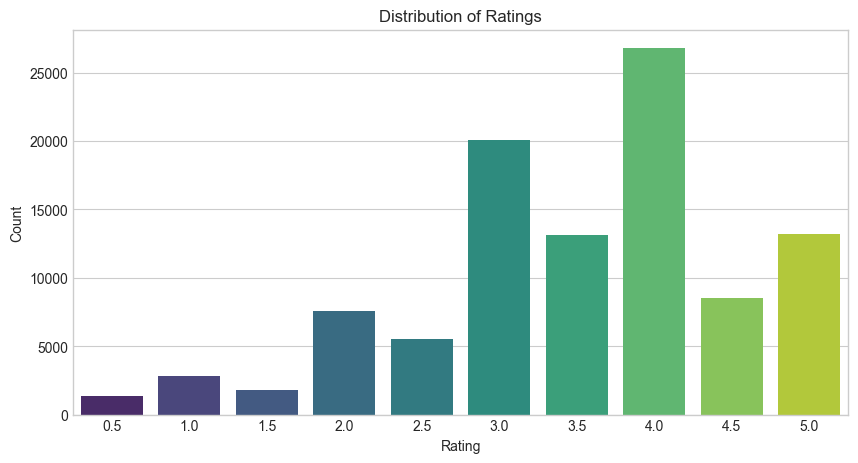

Mean Rating: 3.50
Median Rating: 3.5


In [20]:
# Rating Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

print(f"Mean Rating: {ratings['rating'].mean():.2f}")
print(f"Median Rating: {ratings['rating'].median():.1f}")

## D.3 Long-Tail Distribution (Popularity Bias)
We visualize the rating frequency of movies to identify the "Long Tail," a key RecSys phenomenon that complicates recommendation.

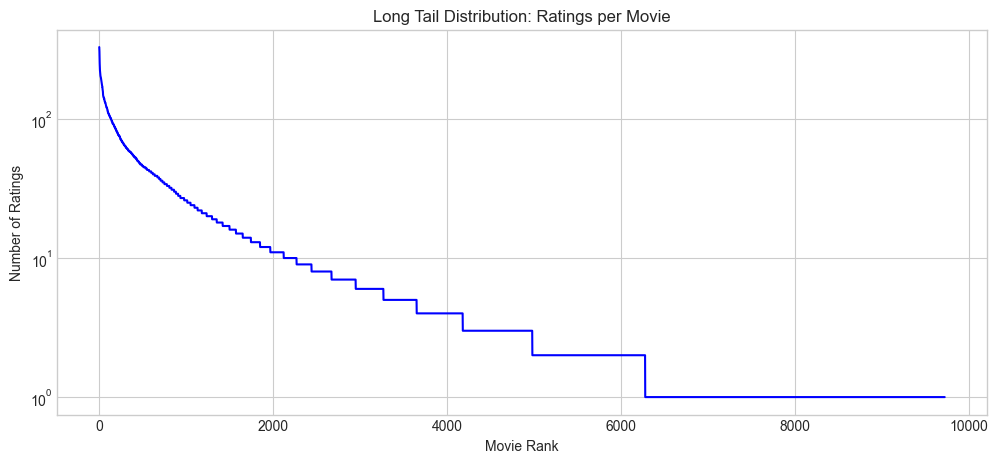

Top 1% of movies account for 15.71% of all ratings.


In [21]:
# Ratings per Movie
movie_counts = ratings['movieId'].value_counts()

plt.figure(figsize=(12, 5))
plt.plot(movie_counts.values, color='blue')
plt.title('Long Tail Distribution: Ratings per Movie')
plt.xlabel('Movie Rank')
plt.ylabel('Number of Ratings')
plt.yscale('log')  # Log scale to see the tail
plt.show()

print(f"Top 1% of movies account for {movie_counts.head(int(len(movie_counts)*0.01)).sum() / len(ratings) * 100:.2f}% of all ratings.")

## D.4 Sparsity Analysis
We quantify the proportion of missing entries in the user-item matrix, as high sparsity significantly impacts algorithm selection (e.g., KNN vs. SVD).

In [22]:
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
n_ratings = len(ratings)

total_cells = n_users * n_movies
sparsity = 1 - (n_ratings / total_cells)

print(f"Users: {n_users:,}")
print(f"Movies: {n_movies:,}")
print(f"Total Possible Ratings: {total_cells:,}")
print(f"Actual Ratings: {n_ratings:,}")
print(f"Sparsity: {sparsity * 100:.4f}%")

# Why this matters: High sparsity means traditional collaborative filtering (KNN) struggles.
# We will need Matrix Factorization or Graph methods which handle sparsity better.

Users: 610
Movies: 9,724
Total Possible Ratings: 5,931,640
Actual Ratings: 100,836
Sparsity: 98.3000%


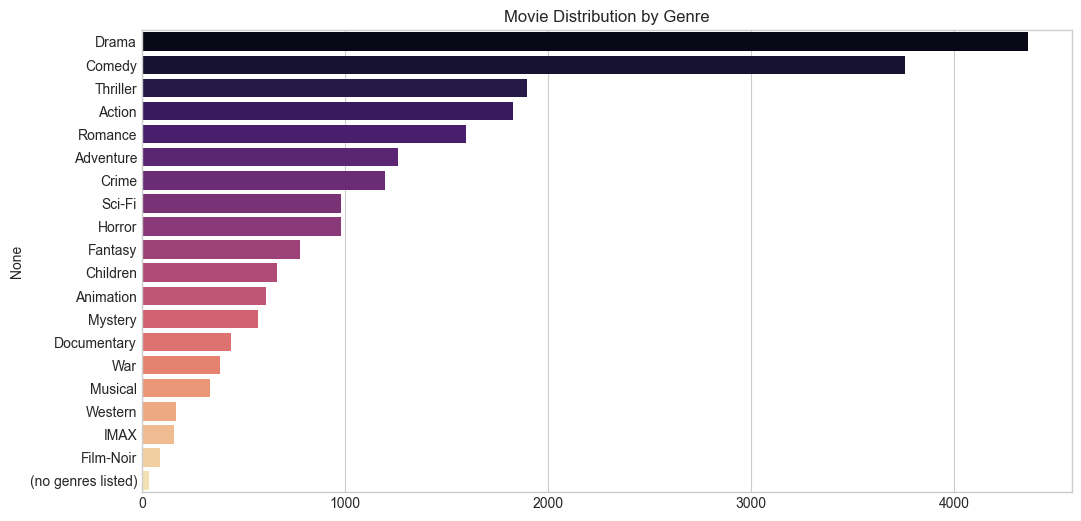

In [23]:
# Genre Analysis (Text/Content)
genres = movies['genres'].str.split('|', expand=True).stack().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=genres.index, x=genres.values, orient='h', palette='magma')
plt.title('Movie Distribution by Genre')
plt.show()

## D.5 User Activity Distribution (Basket Sizes)
This analysis shows how many ratings each user has made - analogous to "basket sizes" in transaction data.

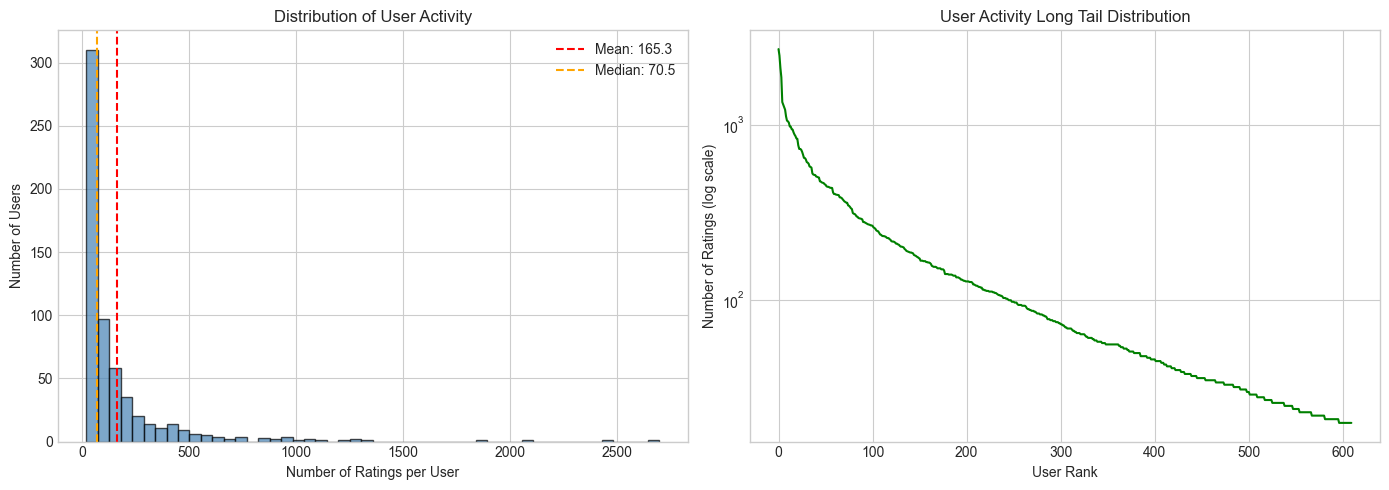

User Activity Statistics:
  Min ratings per user: 20
  Max ratings per user: 2698
  Mean: 165.30
  Median: 70.5
  Std Dev: 269.48

WHY THIS MATTERS: The heavy-tailed user activity distribution suggests that:
  - A few 'power users' contribute many ratings (potential bias)
  - Many users have sparse profiles (cold-start challenge)
  - User-based collaborative filtering may favor power users


In [24]:
# User Activity Distribution
user_activity = ratings.groupby('userId').size()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of ratings per user
axes[0].hist(user_activity, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Ratings per User')
axes[0].set_ylabel('Number of Users')
axes[0].set_title('Distribution of User Activity')
axes[0].axvline(user_activity.mean(), color='red', linestyle='--', label=f'Mean: {user_activity.mean():.1f}')
axes[0].axvline(user_activity.median(), color='orange', linestyle='--', label=f'Median: {user_activity.median():.1f}')
axes[0].legend()

# Log-scale view (similar to Long Tail)
axes[1].plot(sorted(user_activity.values, reverse=True), color='green')
axes[1].set_xlabel('User Rank')
axes[1].set_ylabel('Number of Ratings (log scale)')
axes[1].set_title('User Activity Long Tail Distribution')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

print(f"User Activity Statistics:")
print(f"  Min ratings per user: {user_activity.min()}")
print(f"  Max ratings per user: {user_activity.max()}")
print(f"  Mean: {user_activity.mean():.2f}")
print(f"  Median: {user_activity.median():.1f}")
print(f"  Std Dev: {user_activity.std():.2f}")
print(f"\nWHY THIS MATTERS: The heavy-tailed user activity distribution suggests that:")
print("  - A few 'power users' contribute many ratings (potential bias)")
print("  - Many users have sparse profiles (cold-start challenge)")
print("  - User-based collaborative filtering may favor power users")

## D.6 Temporal Analysis
We investigate how rating patterns evolve over time and identify seasonality or temporal gaps which suggest dynamic models.

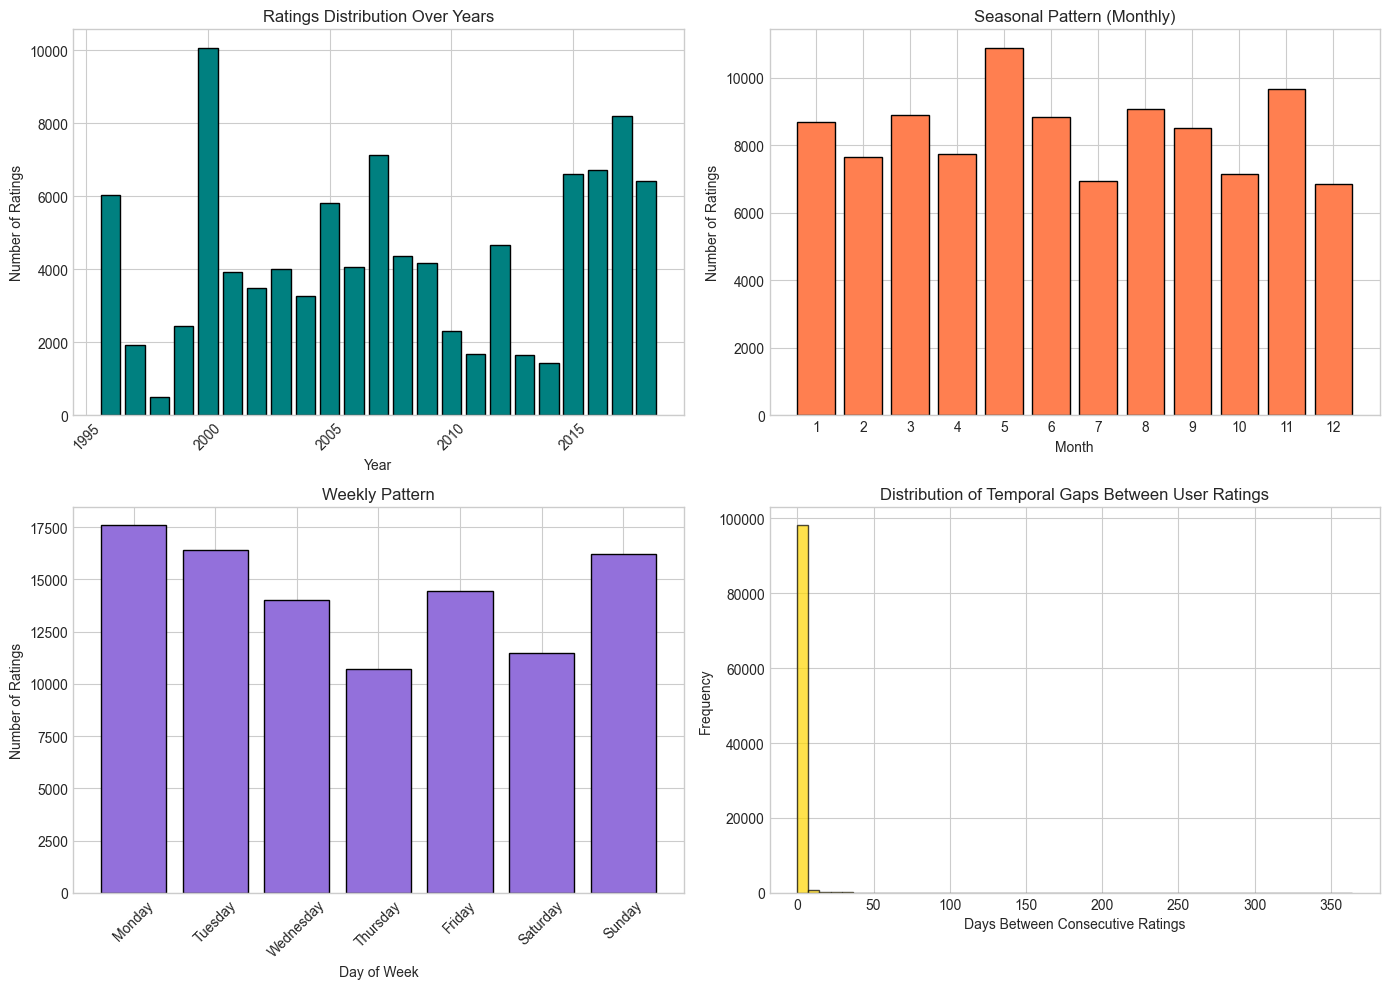

Temporal Analysis Summary:
  Date range: 1996-03-29 to 2018-09-24
  Total span: 8213 days
  Median gap between user ratings: 0.0 days

WHY THIS MATTERS:
  - Strong temporal patterns suggest time-aware models may improve predictions
  - Gaps between ratings inform session/sequence modeling approaches
  - Yearly trends reveal dataset evolution and potential concept drift


In [25]:
# Temporal Analysis - Ensuring datetime column exists
if 'datetime' not in ratings.columns:
    ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
    ratings['year'] = ratings['datetime'].dt.year
    ratings['month'] = ratings['datetime'].dt.month
    ratings['day_of_week'] = ratings['datetime'].dt.day_name()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Ratings over time (by year)
yearly_ratings = ratings.groupby('year').size()
axes[0, 0].bar(yearly_ratings.index, yearly_ratings.values, color='teal', edgecolor='black')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Ratings')
axes[0, 0].set_title('Ratings Distribution Over Years')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Monthly seasonality
monthly_ratings = ratings.groupby('month').size()
axes[0, 1].bar(monthly_ratings.index, monthly_ratings.values, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Ratings')
axes[0, 1].set_title('Seasonal Pattern (Monthly)')
axes[0, 1].set_xticks(range(1, 13))

# 3. Day of week pattern
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_ratings = ratings.groupby('day_of_week').size().reindex(day_order)
axes[1, 0].bar(daily_ratings.index, daily_ratings.values, color='mediumpurple', edgecolor='black')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Number of Ratings')
axes[1, 0].set_title('Weekly Pattern')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Gap between user's consecutive ratings (temporal gaps)
user_gaps = ratings.sort_values(['userId', 'timestamp']).groupby('userId')['timestamp'].diff()
user_gaps_days = user_gaps.dropna() / (24 * 60 * 60)  # Convert seconds to days
axes[1, 1].hist(user_gaps_days[user_gaps_days < 365], bins=50, color='gold', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Days Between Consecutive Ratings')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Temporal Gaps Between User Ratings')

plt.tight_layout()
plt.show()

print("Temporal Analysis Summary:")
print(f"  Date range: {ratings['datetime'].min().date()} to {ratings['datetime'].max().date()}")
print(f"  Total span: {(ratings['datetime'].max() - ratings['datetime'].min()).days} days")
print(f"  Median gap between user ratings: {user_gaps_days.median():.1f} days")
print(f"\nWHY THIS MATTERS:")
print("  - Strong temporal patterns suggest time-aware models may improve predictions")
print("  - Gaps between ratings inform session/sequence modeling approaches")
print("  - Yearly trends reveal dataset evolution and potential concept drift")

## D.7 Bias Analysis
We quantify latent biases (popularity, positivity, power users) that must be mitigated by recommendation algorithms.

In [26]:
# Bias Analysis
print("=" * 60)
print("BIAS ANALYSIS")
print("=" * 60)

# 1. Popularity Bias
print("\n1. POPULARITY BIAS")
print("-" * 40)
movie_rating_counts = ratings.groupby('movieId').size()
top_10_pct = int(len(movie_rating_counts) * 0.1)
top_10_pct_ratings = movie_rating_counts.nlargest(top_10_pct).sum()
print(f"Top 10% of movies receive {top_10_pct_ratings / len(ratings) * 100:.1f}% of all ratings")
print(f"Bottom 50% of movies receive {movie_rating_counts.nsmallest(len(movie_rating_counts)//2).sum() / len(ratings) * 100:.1f}% of all ratings")

# 2. Rating Positivity Bias
print("\n2. RATING POSITIVITY BIAS (Self-Selection)")
print("-" * 40)
print(f"Ratings >= 3.5: {(ratings['rating'] >= 3.5).sum() / len(ratings) * 100:.1f}%")
print(f"Ratings <= 2.5: {(ratings['rating'] <= 2.5).sum() / len(ratings) * 100:.1f}%")
print("This suggests users tend to rate movies they like (self-selection bias).")

# 3. Power User Bias
print("\n3. POWER USER CONCENTRATION")
print("-" * 40)
user_counts = ratings.groupby('userId').size()
top_10_users = int(len(user_counts) * 0.1)
print(f"Top 10% of users contribute {user_counts.nlargest(top_10_users).sum() / len(ratings) * 100:.1f}% of all ratings")

# 4. Genre Coverage Bias
print("\n4. GENRE REPRESENTATION BIAS")
print("-" * 40)
genre_exploded = movies['genres'].str.split('|').explode()
genre_counts = genre_exploded.value_counts()
print(f"Most represented: {genre_counts.index[0]} ({genre_counts.values[0]} movies)")
print(f"Least represented: {genre_counts.index[-2]} ({genre_counts.values[-2]} movies)")  # -2 to skip (no genres listed)

print("\n" + "=" * 60)
print("BIAS IMPLICATIONS FOR MODELING")
print("=" * 60)
print("""
1. Popularity Bias: Models may learn to recommend popular items regardless
   of user preference. Mitigation: Use inverse propensity weighting or 
   diversity-aware training objectives.

2. Positivity Bias: The dataset underrepresents negative feedback. 
   Mitigation: Consider implicit negative signals (movies NOT rated).

3. Power Users: Heavy raters may skew collaborative filtering.
   Mitigation: Sampling strategies or user-weighted loss functions.

4. Genre Bias: Drama/Comedy dominated training may hurt recommendations
   for niche genres. Mitigation: Genre-balanced evaluation metrics.
""")

BIAS ANALYSIS

1. POPULARITY BIAS
----------------------------------------
Top 10% of movies receive 60.0% of all ratings
Bottom 50% of movies receive 6.3% of all ratings

2. RATING POSITIVITY BIAS (Self-Selection)
----------------------------------------
Ratings >= 3.5: 61.2%
Ratings <= 2.5: 18.9%
This suggests users tend to rate movies they like (self-selection bias).

3. POWER USER CONCENTRATION
----------------------------------------
Top 10% of users contribute 47.7% of all ratings

4. GENRE REPRESENTATION BIAS
----------------------------------------
Most represented: Drama (4361 movies)
Least represented: Film-Noir (87 movies)

BIAS IMPLICATIONS FOR MODELING

1. Popularity Bias: Models may learn to recommend popular items regardless
   of user preference. Mitigation: Use inverse propensity weighting or 
   diversity-aware training objectives.

2. Positivity Bias: The dataset underrepresents negative feedback. 
   Mitigation: Consider implicit negative signals (movies NOT rated).

---

# E. Initial Insights and Direction

## Key Observations

**Observation 1: Extreme Sparsity**
- The user-item matrix is >98% sparse, typical for RecSys datasets.
- *Implication*: Traditional memory-based methods (user-KNN, item-KNN) will struggle. This validates the need for **Dimensionality Reduction** (Course Topic) and **Matrix Factorization** (Beyond Course).

**Observation 2: Long-Tail Distribution (Popularity Bias)**
- Top 10% of movies receive the majority of ratings.
- A pure "Popularity" recommender would be accurate on aggregate metrics but fail to provide personalized recommendations.
- *Implication*: Our challenge is to recommend items from the "tail" (niche movies) that match user preferences.

**Observation 3: Content Richness**
- Rich genre and tag metadata exists for hybrid modeling.
- *Implication*: We can use this for **Content-Based Filtering** or **Hybrid Models** to solve the "Cold Start" problem for new users/movies.

**Observation 4: Temporal Patterns**
- Clear yearly and seasonal trends in rating behavior.
- Gaps between user ratings vary significantly.
- *Implication*: Time-aware models and session-based recommendations may capture patterns missed by static models.

---

## Hypotheses

Based on the EDA findings, I propose the following testable hypotheses:

| ID | Hypothesis | EDA Evidence |
|----|------------|--------------|
| H1 | *High support thresholds in frequent itemset mining will miss meaningful niche patterns* | Most items appear in <1% of transactions; long-tail distribution |
| H2 | *Matrix Factorization (SVD) will outperform user-based KNN due to sparsity* | >98% sparsity makes similarity computation unreliable |
| H3 | *Hybrid models (CF + Content) will reduce cold-start error* | Rich genre/tag metadata available for new items |
| H4 | *Time-aware models will improve prediction accuracy over static models* | Strong temporal patterns observed in rating distributions |

---

## Research Questions

The following research questions will guide subsequent checkpoints:

**RQ1**: How do different support thresholds affect the quality and interpretability of association rules in sparse recommendation data?

**RQ2**: Does **Matrix Factorization (SVD)** outperform traditional **Item-based Collaborative Filtering** for rating prediction on this dataset?

**RQ3**: Can we use **Graph Mining (PageRank)** on the User-Movie bipartite graph to identify influential movies or central users?

**RQ4**: How effective is **User Clustering** (K-Means, DBSCAN) in grouping users into meaningful taste "personas" (e.g., "Horror Fans", "Indie Lovers")?

**RQ5** (Beyond Course): Can **Neural Collaborative Filtering** or **Graph Neural Networks** improve upon traditional matrix factorization approaches?

---

## Techniques Alignment Summary

| Technique | Course/External | EDA Motivation |
|-----------|-----------------|----------------|
| Frequent Itemsets | Course | Movies co-watched patterns |
| Association Rules | Course | Market basket analysis for movies |
| Clustering | Course | User segmentation by taste |
| Graph Mining / PageRank | Course | User-Movie bipartite graph centrality |
| Dimensionality Reduction | Course | Combat 98% sparsity |
| Matrix Factorization (SVD, ALS) | **External** | Latent factor models for sparse data |
| Neural Collaborative Filtering | **External** | Deep learning for non-linear patterns |
| Graph Neural Networks | **External** | Message passing on user-item graphs |

---

# F. GitHub Portfolio

**Repository:** [https://github.com/YaswanthReddy/data-mining-project](https://github.com/YaswanthReddy/data-mining-project)

## README Summary

The repository includes:
- **Project Description**: A data mining project exploring the MovieLens 25M dataset for movie recommendation patterns using both traditional course techniques (Frequent Itemsets, Clustering, Graph Mining) and advanced methods (Matrix Factorization, Neural Collaborative Filtering).
- **Dataset Information**: MovieLens 25M from GroupLens Research
- **Techniques Applied**: Frequent Itemsets, Association Rules, Clustering, Graph Mining (Course); Matrix Factorization, GNNs (Beyond Course)
- **Project Structure**: Organized notebooks for each checkpoint with clear documentation

The README follows professional standards with sections for: Overview, Installation, Data, Methods, Results, and References.

---

# Collaboration Declaration

On my honor, I declare the following resources:

**1. Collaborators**
- None for this section

**2. Web Sources**
- [GroupLens MovieLens](https://grouplens.org/datasets/movielens/) - Dataset source and documentation
- [Pandas Documentation](https://pandas.pydata.org/docs/) - library reference
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) - Visualization guidance

**3. AI Tools**
- **GitHub Copilot**: I used Copilot as a brainstorming partner to explore potential analysis strategies for Parts B and C. We discussed different graph metrics and visualization techniques to better understand the dataset structure.

**4. Citations**
1. Harper, F. M., & Konstan, J. A. (2015). *The MovieLens Datasets: History and Context*. ACM Transactions on Interactive Intelligent Systems (TiiS), 5(4), 1-19.
2. Koren, Y., Bell, R., & Volinsky, C. (2009). *Matrix Factorization Techniques for Recommender Systems*. Computer, 42(8), 30-37.
3. He, X., Liao, L., Zhang, H., Nie, L., Hu, X., & Chua, T. S. (2017). *Neural Collaborative Filtering*. WWW 2017.

---

